In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the Dataset file
df = pd.read_csv('../data/raw/wfp_food_prices_rwa.csv')
# 3. Preview the Data
print("Shape:", df.shape)
df.head(10)


In [ ]:
print("="*50)
print('This is a data cleaning script for the project on crop prices forecast in Rwanda.')
print("="*50)


print(' Step 1: Understand Data Columns')
print("="*50)

df.columns 


This is a data cleaning script for the project on crop prices forecast in Rwanda.
 Step 1: Understand Data Columns


Index(['date', 'admin1', 'admin2', 'market', 'market_id', 'latitude',
       'longitude', 'category', 'commodity', 'commodity_id', 'unit',
       'priceflag', 'pricetype', 'currency', 'price', 'usdprice'],
      dtype='object')

In [18]:
print(' Step 2: Filter for Relevant Crops')
print("="*50)

# Clean commodity names to lowercase
df['commodity_clean'] = df['commodity'].str.lower()

# Keep only target crops
target_crops = ['beans', 'maize', 'bananas']
df = df[df['commodity_clean'].isin(target_crops)]

print("Filtered shape:", df.shape)
df[['commodity', 'price', 'unit']].sample(50)

 Step 2: Filter for Relevant Crops
Filtered shape: (10464, 17)


,commodity,price,unit
35232,Bananas,95.0,KG
141149,Maize,186.67,KG
124941,Maize,280.0,KG
133934,Bananas,200.0,KG
104505,Bananas,200.0,KG
128576,Maize,500.0,KG
35244,Maize,250.0,KG
37891,Maize,270.0,KG
96436,Maize,150.0,KG
11002,Bananas,412.5,KG


In [24]:
print(' Step 3: Handle Dates')
print("="*30)

# Convert date column to datetime
print("before date conversion:")
print(df['date'].head())
print("="*30)

df['date'] = pd.to_datetime(df['date'])


# Extract year & month for aggregation
df['year_month'] = df['date'].dt.to_period('M').astype(str)
print("Date conversion successful. Sample dates:")
print(df['year_month'])
print(df.columns)
print("="*30)

 Step 3: Handle Dates
before date conversion:
1   2000-01-15
2   2000-02-15
3   2000-02-15
4   2000-03-15
5   2000-03-15
Name: date, dtype: datetime64[ns]
Date conversion successful. Sample dates:
1         2000-01
2         2000-02
3         2000-02
4         2000-03
5         2000-03
           ...   
143087    2025-07
143094    2025-07
143103    2025-07
143109    2025-07
143116    2025-07
Name: year_month, Length: 10464, dtype: object
Index(['date', 'admin1', 'admin2', 'market', 'market_id', 'latitude',
       'longitude', 'category', 'commodity', 'commodity_id', 'unit',
       'priceflag', 'pricetype', 'currency', 'price', 'usdprice',
       'commodity_clean', 'year_month'],
      dtype='object')


In [35]:
print('Step 4: Clean Missing or Invalid Values')
print("="*30)

print("Before data cleaning: ")
print(df.info())
print("="*30)

# Check for missing values
print("Missing values before cleaning: ", df.isnull().sum().count())
print("="*30)

print("Missing values: ", df.isnull().sum())
print("="*30)

print("Unique values before cleaning: ", df.nunique().count())
print("="*30)

print("Unique values: ", df.nunique())
print("="*30)

# Drop rows with missing price or date

# Convert 'price' to numeric (clean bad formatting)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows where price or date is missing
print("Before dropping missing values, shape:", df.shape)
print("="*30)

df = df.dropna(subset=['price', 'date'])
print("After dropping missing values, shape:", df.shape)
print("="*30)

# Drop unrealistic prices
df = df[df['price'] > 0]

print("Missing values handled. Remaining shape:", df.shape)


Step 4: Clean Missing or Invalid Values
Before data cleaning: 
<class 'pandas.core.frame.DataFrame'>
Index: 10464 entries, 1 to 143116
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             10464 non-null  datetime64[ns]
 1   admin1           10464 non-null  object        
 2   admin2           10464 non-null  object        
 3   market           10464 non-null  object        
 4   market_id        10464 non-null  object        
 5   latitude         10464 non-null  object        
 6   longitude        10464 non-null  object        
 7   category         10464 non-null  object        
 8   commodity        10464 non-null  object        
 9   commodity_id     10464 non-null  object        
 10  unit             10464 non-null  object        
 11  priceflag        10464 non-null  object        
 12  pricetype        10464 non-null  object        
 13  currency         10464 non-null 

In [37]:
print('Step 5: Standardize Units')
print("="*30)

# Preview unique units
print(df['unit'].unique())

# Keep only consistent unit (e.g., Kilogram)
df = df[df['unit'].str.lower().str.contains('kg')]



Step 5: Standardize Units
['KG']


In [39]:
print('Step 6: Group Monthly Prices per Crop')
print("="*30)
monthly_df = df.groupby(['year_month', 'commodity_clean'])['price'].mean().reset_index()
monthly_df.rename(columns={'price': 'avg_price'}, inplace=True)
monthly_df.head(20)


Step 6: Group Monthly Prices per Crop


,year_month,commodity_clean,avg_price
0,2000-01,beans,108.02
1,2000-02,beans,110.22
2,2000-02,maize,152.66
3,2000-03,beans,110.22
4,2000-03,maize,159.27
5,2000-04,beans,116.83
6,2000-04,maize,180.76
7,2000-05,beans,128.41
8,2000-06,beans,141.63
9,2000-06,maize,145.49


In [40]:
# Save to processed folder
monthly_df.to_csv('../data/processed/monthly_avg_prices.csv', index=False)
print("Monthly average prices saved to ../data/processed/monthly_avg_prices.csv")

Monthly average prices saved to ../data/processed/monthly_avg_prices.csv


Step 7: Quick Visualization


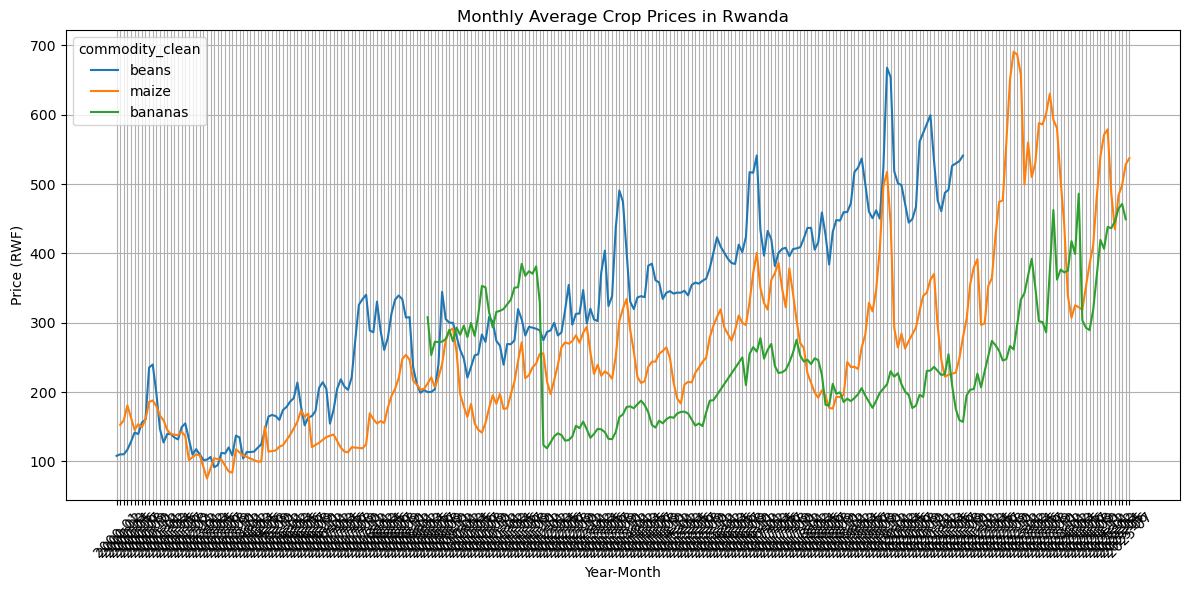

Data cleaning and visualization complete.


In [41]:
print('Step 7: Quick Visualization')
print("="*30)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_df, x='year_month', y='avg_price', hue='commodity_clean')
plt.xticks(rotation=45)
plt.title('Monthly Average Crop Prices in Rwanda')
plt.xlabel('Year-Month')
plt.ylabel('Price (RWF)')
plt.grid(True)
plt.tight_layout()
plt.show()
print("Data cleaning and visualization complete.")